# Weather Analysis

Martín Singla - Data Analyst 

#### Project Description
As per known by common sense and scientific evidence, the closer we get to Earth´s Equator, the hotter average temperatures get due to proximity to the Sun. In this project we will try to prove this through data and statistical evidence. We will generate a random sample of cities across the globe, with their geographic coordinates, and we will get the current meteorological data for each of those cities. Subsequently, we will run a regression analysis to check the statistical relationship between those meteorological variables and proximity to the Equator.  

We will use API ......

#### Libraries, API keys & Data

In [62]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

#API keys
from api_keys import weather_key


#### Identification of Cities

In [43]:
#Generating list of cities to analyze

#Citipy library finds city name nearest to a specified geo-coord
#Usage explained by authors in: https://github.com/wingchen/citipy
from citipy import citipy 

#Getting geo-coords sample
np.random.seed(99) #setting seed to get same results as running the script multiple times

#Minimum and Maxium Latitud in the World: -90º to 90º
lat_samp = np.random.uniform(low= -90, high= 90, size= 10000)
#Minimum and Maxium Longitude in the World: -180º to 180
lng_samp = np.random.uniform(low= -180, high= 180, size= 10000)

#Searching for city names
city_names = []
country_codes = []
for i in range(0, 10000):
    a = citipy.nearest_city(lat_samp[i], lng_samp[i])
    city_names.append(a.city_name)
    country_codes.append(a.country_code)
len(city_names) #10000 city names matched

#removing duplicated cities
unique_cities = []
unique_lat = []
unique_lng = []
unique_country= []

for i in range(0, 10000):
    if city_names[i] not in unique_cities:
        unique_cities.append(city_names[i])
        unique_lat.append(lat_samp[i])
        unique_lng.append(lat_samp[i])
        unique_country.append(country_codes[i])

#creating dataframe
df = pd.DataFrame({
    "City" : unique_cities, "Country_code" : unique_country,
    "Lat" : unique_lat, "Lng" : unique_lng
})        

print(f'{len(df)} unique cities identified') 

,City,Country_code,Lat,Lng
0,los llanos de aridane,es,31.010141,31.010141
1,rungata,ki,-2.145888,-2.145888
2,paamiut,gl,58.589131,58.589131
3,mataura,pf,-84.339650,-84.339650
4,arman,ru,55.448993,55.448993
5,hilo,us,11.811136,11.811136
6,rikitea,pf,-36.427950,-36.427950
7,hobart,au,-81.594770,-81.594770
8,dikson,ru,88.312932,88.312932
9,albany,au,-88.771368,-88.771368


#### Meteorological Data

In [46]:
#Gathering Meteorological data through OpenWeather API
#Documentation available in: https://openweathermap.org/current
#The task requires us to get values in Imperial System 

df["Temperature (F)"] = ''
df["Humidity (%)"] = ''
df["Cloudiness (%)"] = ''
df["Wind Speed (mph)"] = ''
df["Preassure"] = ''
df["Sea Level (ft)"] = ''

#Looping over df to find city temperatures
for i in range(0, len(df)):
    
    #querying
    print(f'{i}: Querying city: {df.iloc[i,0]}')
    url = f'http://api.openweathermap.org/data/2.5/weather?q={df.iloc[i,0]}&appid={weather_key}&units=imperial'
    response = requests.get(url)
    response = response.json()
    
    try:
        #Assingning to df
        df.iloc[i, 4] = response["main"]["temp"] 
        df.iloc[i, 5] = response["main"]["humidity"] 
        df.iloc[i, 6] = response["clouds"]["all"] 
        df.iloc[i, 7] = response["wind"]["speed"] 
        df.iloc[i, 8] = response["main"]["pressure"] 
        df.iloc[i, 9] = response["main"]["sea_level"] 
    
    except:
        print(f'Information not found for city {df.iloc[i,0]}')
        pass

#Cleaning df
df = df.replace("", float("NaN"))
df = df.dropna(subset= ["Temperature (F)"])

#Saving raw df
df.to_csv("results/global_city_weather_df.csv", index= False)

df.head()

0: Querying city: los llanos de aridane
Information not found for city los llanos de aridane
1: Querying city: rungata
Information not found for city rungata
2: Querying city: paamiut
3: Querying city: mataura
Information not found for city mataura
4: Querying city: arman
5: Querying city: hilo
Information not found for city hilo
6: Querying city: rikitea
7: Querying city: hobart
Information not found for city hobart
8: Querying city: dikson
9: Querying city: albany
Information not found for city albany
10: Querying city: karkaralinsk
Information not found for city karkaralinsk
11: Querying city: port hardy
Information not found for city port hardy
12: Querying city: alofi
Information not found for city alofi
13: Querying city: amuntai
14: Querying city: qaanaaq
15: Querying city: caravelas
16: Querying city: yellowknife
Information not found for city yellowknife
17: Querying city: ushuaia
Information not found for city ushuaia
18: Querying city: port-cartier
Information not found for 

154: Querying city: emerald
Information not found for city emerald
155: Querying city: baykit
156: Querying city: luwuk
157: Querying city: clyde river
Information not found for city clyde river
158: Querying city: sinegorye
159: Querying city: houma
Information not found for city houma
160: Querying city: burica
Information not found for city burica
161: Querying city: barrow
Information not found for city barrow
162: Querying city: avarua
Information not found for city avarua
163: Querying city: mar del plata
Information not found for city mar del plata
164: Querying city: kawalu
165: Querying city: hambantota
Information not found for city hambantota
166: Querying city: khatanga
167: Querying city: wielun
Information not found for city wielun
168: Querying city: mecca
169: Querying city: brigantine
Information not found for city brigantine
170: Querying city: leshukonskoye
171: Querying city: toyooka
Information not found for city toyooka
172: Querying city: taoudenni
173: Querying 

311: Querying city: sao filipe
312: Querying city: celestun
313: Querying city: saveh
314: Querying city: gladstone
Information not found for city gladstone
315: Querying city: kondinskoye
316: Querying city: maxixe
Information not found for city maxixe
317: Querying city: fallon
Information not found for city fallon
318: Querying city: saint-joseph
Information not found for city saint-joseph
319: Querying city: pudozh
320: Querying city: paita
321: Querying city: straumen
Information not found for city straumen
322: Querying city: promyshlennaya
Information not found for city promyshlennaya
323: Querying city: duderstadt
Information not found for city duderstadt
324: Querying city: cockburn town
325: Querying city: dolbeau
Information not found for city dolbeau
326: Querying city: mangrol
327: Querying city: kihei
Information not found for city kihei
328: Querying city: crown point
Information not found for city crown point
329: Querying city: kuching
Information not found for city ku

Information not found for city mayo
480: Querying city: yenagoa
481: Querying city: barcelos
Information not found for city barcelos
482: Querying city: road town
Information not found for city road town
483: Querying city: itapetinga
484: Querying city: tukrah
485: Querying city: strathmore
486: Querying city: kargat
487: Querying city: tampere
Information not found for city tampere
488: Querying city: quatre cocos
Information not found for city quatre cocos
489: Querying city: kununurra
Information not found for city kununurra
490: Querying city: nyurba
491: Querying city: belyy yar
Information not found for city belyy yar
492: Querying city: meyungs
Information not found for city meyungs
493: Querying city: kemijarvi
494: Querying city: deputatskiy
495: Querying city: bur gabo
Information not found for city bur gabo
496: Querying city: lompoc
Information not found for city lompoc
497: Querying city: valparaiso
Information not found for city valparaiso
498: Querying city: villa carlo

639: Querying city: kinkala
Information not found for city kinkala
640: Querying city: aktau
Information not found for city aktau
641: Querying city: abu jubayhah
Information not found for city abu jubayhah
642: Querying city: tacuarembo
643: Querying city: champerico
Information not found for city champerico
644: Querying city: port pirie
Information not found for city port pirie
645: Querying city: anar darreh
Information not found for city anar darreh
646: Querying city: enshi
647: Querying city: mrirt
Information not found for city mrirt
648: Querying city: obo
649: Querying city: le port
Information not found for city le port
650: Querying city: pacific grove
Information not found for city pacific grove
651: Querying city: umm kaddadah
652: Querying city: junqueiro
653: Querying city: sakakah
Information not found for city sakakah
654: Querying city: isla mujeres
Information not found for city isla mujeres
655: Querying city: gornyy
Information not found for city gornyy
656: Query

802: Querying city: itoman
Information not found for city itoman
803: Querying city: inirida
804: Querying city: belmonte
Information not found for city belmonte
805: Querying city: bernau
Information not found for city bernau
806: Querying city: huilong
Information not found for city huilong
807: Querying city: trincomalee
808: Querying city: wilmington
Information not found for city wilmington
809: Querying city: daman
810: Querying city: hervey bay
Information not found for city hervey bay
811: Querying city: ranong
Information not found for city ranong
812: Querying city: roald
Information not found for city roald
813: Querying city: kibala
Information not found for city kibala
814: Querying city: norden
Information not found for city norden
815: Querying city: adre
816: Querying city: mpika
817: Querying city: bonthe
818: Querying city: lamar
Information not found for city lamar
819: Querying city: saurimo
820: Querying city: hovd
821: Querying city: abyek
Information not found fo

965: Querying city: taksimo
966: Querying city: sao miguel
Information not found for city sao miguel
967: Querying city: chimoio
Information not found for city chimoio
968: Querying city: trairi
969: Querying city: casa nova
Information not found for city casa nova
970: Querying city: lamu
971: Querying city: nagato
Information not found for city nagato
972: Querying city: khonuu
Information not found for city khonuu
973: Querying city: margate
Information not found for city margate
974: Querying city: licheng
Information not found for city licheng
975: Querying city: karaul
Information not found for city karaul
976: Querying city: pringsewu
977: Querying city: manavalakurichi
Information not found for city manavalakurichi
978: Querying city: prachuap khiri khan
Information not found for city prachuap khiri khan
979: Querying city: chapais
Information not found for city chapais
980: Querying city: balabac
981: Querying city: channel-port aux basques
982: Querying city: dianalund
Inform

1130: Querying city: bol
1131: Querying city: oraiokastron
Information not found for city oraiokastron
1132: Querying city: metehara
Information not found for city metehara
1133: Querying city: vikesa
Information not found for city vikesa
1134: Querying city: ust-kamchatsk
Information not found for city ust-kamchatsk
1135: Querying city: nizhnedevitsk
Information not found for city nizhnedevitsk
1136: Querying city: lerwick
Information not found for city lerwick
1137: Querying city: kinsale
Information not found for city kinsale
1138: Querying city: matara
1139: Querying city: hammerfest
Information not found for city hammerfest
1140: Querying city: tema
Information not found for city tema
1141: Querying city: huarmey
1142: Querying city: oulainen
Information not found for city oulainen
1143: Querying city: ozernovskiy
1144: Querying city: abu samrah
1145: Querying city: las cruces
Information not found for city las cruces
1146: Querying city: bonga
1147: Querying city: killam
1148: Qu

Information not found for city orem
1286: Querying city: sao joao da barra
1287: Querying city: finspang
Information not found for city finspang
1288: Querying city: kviteseid
Information not found for city kviteseid
1289: Querying city: luanda
1290: Querying city: elat
Information not found for city elat
1291: Querying city: ust-kulom
1292: Querying city: horki
Information not found for city horki
1293: Querying city: misratah
1294: Querying city: jalna
Information not found for city jalna
1295: Querying city: madiun
1296: Querying city: ardakan
Information not found for city ardakan
1297: Querying city: sitangkai
1298: Querying city: liverpool
Information not found for city liverpool
1299: Querying city: hihifo
Information not found for city hihifo
1300: Querying city: khasan
1301: Querying city: mago
1302: Querying city: mangai
1303: Querying city: sandwick
Information not found for city sandwick
1304: Querying city: manaure
1305: Querying city: ritchie
Information not found for cit

Information not found for city ketchikan
1455: Querying city: tapah
Information not found for city tapah
1456: Querying city: hope
Information not found for city hope
1457: Querying city: high prairie
1458: Querying city: eston
Information not found for city eston
1459: Querying city: ust-shonosha
1460: Querying city: ozgon
Information not found for city ozgon
1461: Querying city: lakatoro
1462: Querying city: wanaka
1463: Querying city: pizarro
1464: Querying city: say
Information not found for city say
1465: Querying city: ugoofaaru
1466: Querying city: zolotinka
Information not found for city zolotinka
1467: Querying city: cheuskiny
Information not found for city cheuskiny
1468: Querying city: ampanihy
1469: Querying city: belozerskoye
1470: Querying city: scottsburgh
Information not found for city scottsburgh
1471: Querying city: vengerovo
1472: Querying city: myrtle beach
Information not found for city myrtle beach
1473: Querying city: huangmei
1474: Querying city: zamora
1475: Qu

1615: Querying city: tagusao
1616: Querying city: majalgaon
1617: Querying city: silifke
1618: Querying city: palu
1619: Querying city: orange walk
1620: Querying city: athabasca
1621: Querying city: yarkovo
1622: Querying city: loandjili
Information not found for city loandjili
1623: Querying city: domodossola
Information not found for city domodossola
1624: Querying city: chor
1625: Querying city: norrtalje
Information not found for city norrtalje
1626: Querying city: albina
1627: Querying city: miles city
Information not found for city miles city
1628: Querying city: karlstad
Information not found for city karlstad
1629: Querying city: kewanee
Information not found for city kewanee
1630: Querying city: appleton
Information not found for city appleton
1631: Querying city: rajgarh
1632: Querying city: beyneu
1633: Querying city: novo aripuana
1634: Querying city: lufkin
Information not found for city lufkin
1635: Querying city: san andres
Information not found for city san andres
1636

1783: Querying city: pionerskiy
Information not found for city pionerskiy
1784: Querying city: bambanglipuro
1785: Querying city: wanderlandia
Information not found for city wanderlandia
1786: Querying city: port huron
Information not found for city port huron
1787: Querying city: finschhafen
1788: Querying city: peyima
1789: Querying city: mishan
1790: Querying city: puerto rondon
1791: Querying city: agirish
1792: Querying city: haren
Information not found for city haren
1793: Querying city: lumbia
Information not found for city lumbia
1794: Querying city: phan thiet
1795: Querying city: gonbad-e qabus
Information not found for city gonbad-e qabus
1796: Querying city: kyabram
Information not found for city kyabram
1797: Querying city: staryy nadym
1798: Querying city: gagra
Information not found for city gagra
1799: Querying city: grants
Information not found for city grants
1800: Querying city: kichera
1801: Querying city: kuruman
1802: Querying city: dalvik
Information not found fo

Information not found for city songea
1953: Querying city: payo
1954: Querying city: sao gabriel da cachoeira
1955: Querying city: winnemucca
Information not found for city winnemucca
1956: Querying city: togur
1957: Querying city: ludvika
Information not found for city ludvika
1958: Querying city: mananjary
1959: Querying city: macamic
Information not found for city macamic
1960: Querying city: menongue
1961: Querying city: paciran
1962: Querying city: tooele
Information not found for city tooele
1963: Querying city: barawe
Information not found for city barawe
1964: Querying city: chavakkad
Information not found for city chavakkad
1965: Querying city: abatskoye
1966: Querying city: muskegon
Information not found for city muskegon
1967: Querying city: snasa
Information not found for city snasa
1968: Querying city: aybak
Information not found for city aybak
1969: Querying city: mutoko
1970: Querying city: margaride
Information not found for city margaride
1971: Querying city: boende
19

2110: Querying city: quijingue
2111: Querying city: sao sebastiao
2112: Querying city: laurel
Information not found for city laurel
2113: Querying city: andrelandia
2114: Querying city: puerto madryn
2115: Querying city: buchanan
Information not found for city buchanan
2116: Querying city: nisia floresta
Information not found for city nisia floresta
2117: Querying city: fengzhen
2118: Querying city: magistralnyy
2119: Querying city: miracema do tocantins
2120: Querying city: jati
2121: Querying city: salinas
Information not found for city salinas
2122: Querying city: wagar
2123: Querying city: roswell
Information not found for city roswell
2124: Querying city: yurecuaro
2125: Querying city: mgandu
2126: Querying city: bichena
2127: Querying city: khash
2128: Querying city: urucara
2129: Querying city: forrest city
Information not found for city forrest city
2130: Querying city: port shepstone
2131: Querying city: stodolishche
2132: Querying city: farafangana
2133: Querying city: male
I

Information not found for city conceicao do araguaia
2270: Querying city: vysokogornyy
2271: Querying city: villarrica
2272: Querying city: kosonsoy
Information not found for city kosonsoy
2273: Querying city: balasinor
Information not found for city balasinor
2274: Querying city: mandiana
2275: Querying city: howard springs
Information not found for city howard springs
2276: Querying city: san martin jilotepeque
Information not found for city san martin jilotepeque
2277: Querying city: portalegre
Information not found for city portalegre
2278: Querying city: papiu ilarian
Information not found for city papiu ilarian
2279: Querying city: santo domingo suchitepequez
Information not found for city santo domingo suchitepequez
2280: Querying city: micheweni
2281: Querying city: formosa
Information not found for city formosa
2282: Querying city: veraval
2283: Querying city: otjimbingwe
2284: Querying city: komono
Information not found for city komono
2285: Querying city: ziro
Information no

,City,Country_code,Lat,Lng,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Preassure,Sea Level (ft)
0,los llanos de aridane,es,31.010141,31.010141,62.6,67,0,6.91,1012,
1,rungata,ki,-2.145888,-2.145888,,,,,,
2,paamiut,gl,58.589131,58.589131,36.03,81,57,11.05,1032,1032
3,mataura,pf,-84.339650,-84.339650,54,87,96,10,1016,
4,arman,ru,55.448993,55.448993,32.58,76,13,2.28,1019,1019
5,hilo,us,11.811136,11.811136,71.96,61,90,3.44,1015,
6,rikitea,pf,-36.427950,-36.427950,76.98,73,100,11.25,1016,1016
7,hobart,au,-81.594770,-81.594770,61.84,48,75,11.5,1020,
8,dikson,ru,88.312932,88.312932,32.59,89,100,18.5,1000,1000
9,albany,au,-88.771368,-88.771368,51.22,65,79,1.28,1010,


#### Meteorological Data Visualization 

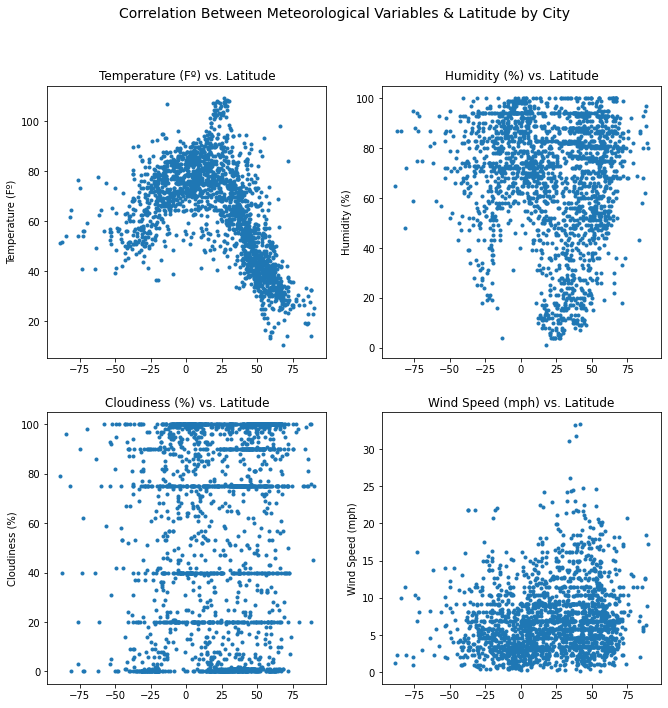

In [94]:
#Scatter-plots for multiple variables

fig, axs = plt.subplots(2,2, figsize=(11,11))
fig.suptitle("Correlation Between Meteorological Variables & Latitude by City", size= 14)
axs[0,0].scatter(df.loc[:,"Lat"], df.loc[:,"Temperature (F)"], marker= ".")
axs[0,0].set_title("Temperature (Fº) vs. Latitude")
axs[0,0].set_ylabel("Temperature (Fº)")
axs[0,1].scatter(df.loc[:,"Lat"], df.loc[:,"Humidity (%)"], marker= ".")
axs[0,1].set_title("Humidity (%) vs. Latitude")
axs[0,1].set_ylabel("Humidity (%)")
axs[1,0].scatter(df.loc[:,"Lat"], df.loc[:,"Cloudiness (%)"], marker= ".")
axs[1,0].set_title("Cloudiness (%) vs. Latitude")
axs[1,0].set_ylabel("Cloudiness (%)")
axs[1,1].scatter(df.loc[:,"Lat"], df.loc[:,"Wind Speed (mph)"], marker= ".")
axs[1,1].set_title("Wind Speed (mph) vs. Latitude")
axs[1,1].set_ylabel("Wind Speed (mph)")
plt.show()